In [238]:
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model , model_selection, metrics, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,confusion_matrix


In [148]:
n=1000

In [149]:
X, y = datasets.make_regression(n_samples=n, n_features=1, noise=10, random_state=42)

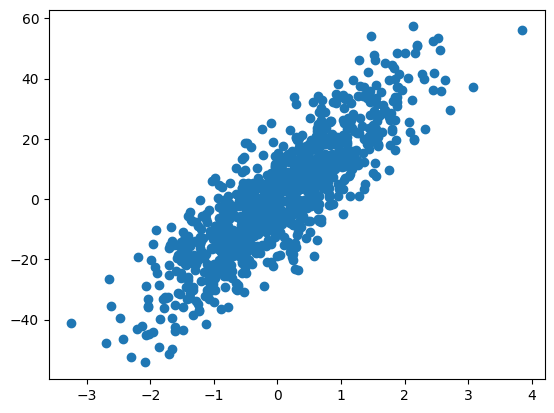

In [150]:
plt.scatter(X,y)

In [151]:
linear = linear_model.LinearRegression()
linear.fit(X, y)

LinearRegression()

In [152]:
y_predict = linear.predict(X)

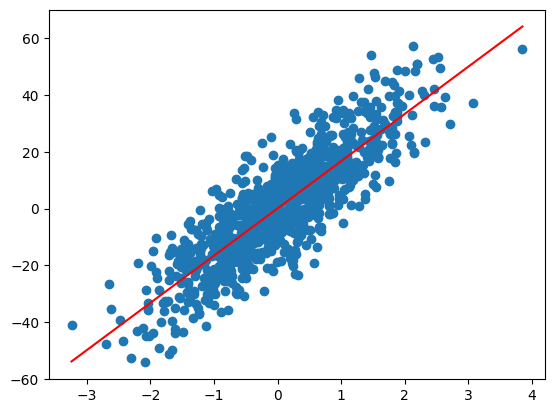

In [153]:
plt.scatter(X,y)
plt.plot([mixn(X),max(X)],[min(y_predict),max(y_predict)],color='red')

(array([  7.,  38.,  79., 175., 209., 232., 158.,  66.,  27.,   9.]),
 array([-28.89078828, -23.02441253, -17.15803678, -11.29166103,
         -5.42528528,   0.44109047,   6.30746622,  12.17384197,
         18.04021771,  23.90659346,  29.77296921]),
 <BarContainer object of 10 artists>)

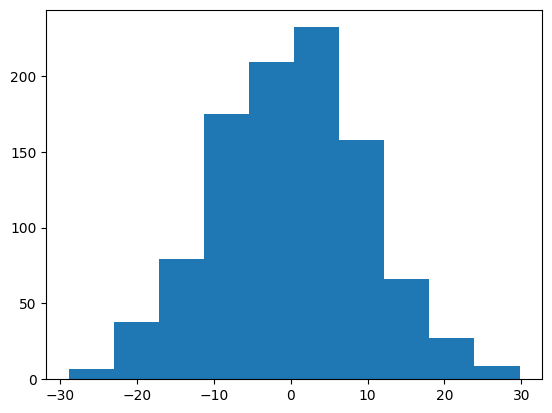

In [154]:
error = y-y_predict
plt.hist(error)

In [155]:
new_X = np.append(X,np.array(4))
new_y = np.append(y,np.array(100))

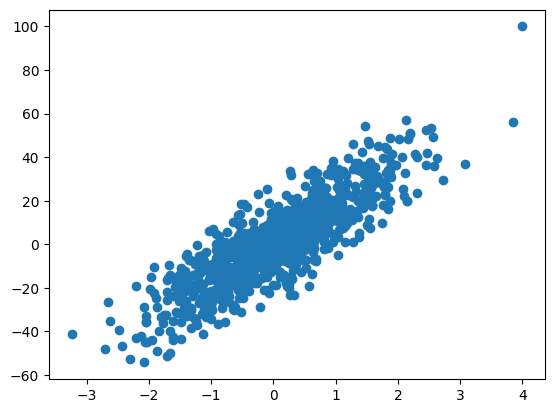

In [156]:
plt.scatter(new_X, new_y)

In [157]:
# new_X=new_X.reshape(-1, 1)
# new_y=new_y.reshape(-1, 1)

In [158]:
linear2 = linear_model.LinearRegression()


In [165]:
# linear2.fit(new_X,new_y)

In [166]:
# y_predict2 = linear2.predict(new_y)

In [168]:
# plt.scatter(new_X,new_y)
# plt.plot([min(new_X),max(new_X)],[min(y_predict2),max(y_predict2)],color='yellow')

In [277]:
raw_df = pd.read_csv('../../datasets/AirQuality.csv',delimiter=';')

In [339]:
raw_df;

In [319]:
df = raw_df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
df = df.dropna(thresh=1,axis=0) 
df['C6H6(GT)']=df['C6H6(GT)'].map(lambda x: float(x.replace(',','.')))
df['CO(GT)']=df['CO(GT)'].map(lambda x: float(x.replace(',','.')))
df['T']=df['T'].map(lambda x: float(x.replace(',','.')))
df['RH']=df['RH'].map(lambda x: float(x.replace(',','.'))) 
df['AH']=df['AH'].map(lambda x: float(x.replace(',','.'))) 
df = df.replace(-200, np.nan)
df = df.dropna()

In [340]:
df;

In [341]:
df.describe();

In [324]:
df = df.drop(['Date','Time'],axis=1)

In [325]:
X = df.drop('T',axis=1)

In [326]:
y=df['T']

In [327]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [343]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [329]:
LR = linear_model.LinearRegression()

In [330]:
LR.fit(X_train,y_train)

LinearRegression()

In [331]:
y_predict = LR.predict(X_test)

In [332]:
metrics.mean_absolute_error(y_test,y_predict)

0.7268865905634557

In [346]:
df.describe();

In [334]:
metrics.mean_absolute_percentage_error(y_test,y_predict)

0.052282805203145585

In [335]:
y_predict_bias = LR.predict(X_train)

In [338]:
metrics.mean_absolute_percentage_error(y_train, y_predict_bias)

0.051381167623575634

In [345]:
LR_SCALE = linear_model.LinearRegression()
LR_SCALE.fit(X_train_scaled,y_train)

LinearRegression()

In [349]:
y_predict_scale = LR_SCALE.predict(X_test_scaled)

In [350]:
metrics.mean_absolute_error(y_test,y_predict_scale)

0.7268865905634564

## feature importance

In [356]:
LR.coef_

array([-9.10888893e-01, -1.15623626e-03, -7.69457871e-04,  7.92187075e-02,
        1.04441104e-02,  4.66238487e-03,  3.25063221e-03,  1.17756567e-02,
       -4.00990152e-03, -1.21891719e-03, -3.24032415e-01,  2.02471673e+01])

In [353]:
LR.intercept_

10.154422689465981

In [354]:
LR_SCALE.coef_

array([-1.29343922, -0.27765823, -0.16148233,  0.58731536,  2.79306326,
        0.38572334,  0.87672063,  0.3685565 , -1.21372104, -0.49221885,
       -4.99347313,  3.55698949])

In [358]:
df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.936261,0.887167,0.972660,0.958426,0.951342,-0.823728,0.861432,0.939921,0.882943,0.318261,-0.105157,0.295591
PT08.S1(CO),0.936261,1.000000,0.781747,0.931368,0.936346,0.922885,-0.829577,0.866579,0.945020,0.935011,0.324815,-0.039570,0.407038
NMHC(GT),0.887167,0.781747,1.000000,0.897928,0.875061,0.811182,-0.774237,0.728052,0.848489,0.761905,0.366976,-0.160257,0.282142
C6H6(GT),0.972660,0.931368,0.897928,1.000000,0.984834,0.927304,-0.848850,0.846743,0.960811,0.896978,0.418409,-0.178410,0.313415
PT08.S2(NMHC),0.958426,0.936346,0.875061,0.984834,1.000000,0.926633,-0.910651,0.885023,0.957883,0.909100,0.445615,-0.193333,0.325333
NOx(GT),0.951342,0.922885,0.811182,0.927304,0.926633,1.000000,-0.814297,0.857425,0.912724,0.893381,0.238395,-0.041975,0.270679
PT08.S3(NOx),-0.823728,-0.829577,-0.774237,-0.848850,-0.910651,-0.814297,1.000000,-0.815224,-0.880213,-0.857526,-0.423946,0.096834,-0.463016
NO2(GT),0.861432,0.866579,0.728052,0.846743,0.885023,0.857425,-0.815224,1.000000,0.807792,0.839656,0.406807,-0.223033,0.214559
PT08.S4(NO2),0.939921,0.945020,0.848489,0.960811,0.957883,0.912724,-0.880213,0.807792,1.000000,0.918996,0.343626,0.012389,0.515530
PT08.S5(O3),0.882943,0.935011,0.761905,0.896978,0.909100,0.893381,-0.857526,0.839656,0.918996,1.000000,0.313458,-0.014530,0.440198


In [359]:
import seaborn as sns 

<Axes: >

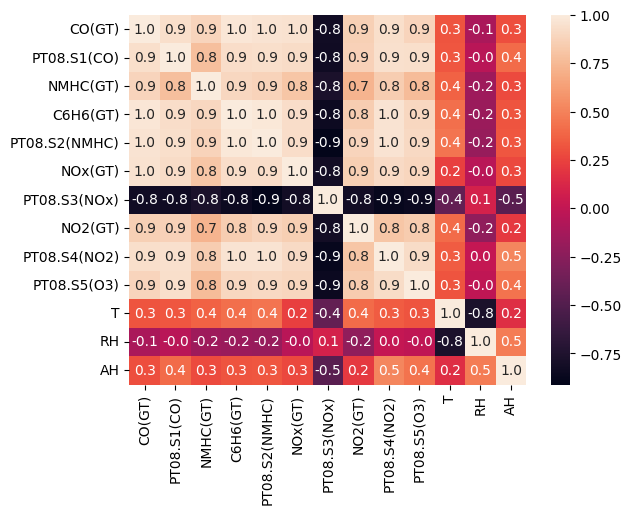

In [364]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')